## Análisis exploratorio de datos. Técnicas para el manejo de NaNs, ceros y valores atípicos.

El presente ejercicio de análisis exploratorio de datos “EDA” está basado en el artículo publicado por Misael Uribe, “Applied Exploratory Data Analysis, Bike-Sharing. The Power of Visualization, Python” y fue elaborado como una versión de estudio para comprender el uso de las herramientas utilizadas por el autor para la correcta aplicación de la técnica. Se realizaron algunos cambios en el orden de ejecución de los pasos, para mayor comprensión de personas con conocimiento intermedio en el uso de las librerías de Python y el lector podrá encontrar cambios en algunos procedimientos de análisis los cuales se realizan con la intención de complementar el articulo anteriormente mencionado.   

El estudio esta basado en el data set de "Bike-sharing" el cual contiene datos de ceros, NaN y desviaciones en parámetros los cuales se utilizaran para describir algunas técnicas de corrección y ajuste.

### 1. Analizando los datos
La base datos de alquiler de bicicletas que vamos a analizar contiene los siguientes datos:

Datos específicos de la base de datos:

*  dteday      : fecha (sin especificación de tiempo)
*  season      : estación (spring, summer, fall, winter)
*  hr          : hora (0 a 23)
*  holiday     : Indica si es festivo o no (0=no, 1=si)
*  weekday     : Dia de la semana ('Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday') 
*  workingday  : Si el día no es fin de semana o festivo indica 1, de lo contrario e 0.
*  weathersit  : Apreciación del estado del clima (Clear, Slightly Cloudy, Light Snow, Thunderstorm)
*  temp        : Temperatura normalizada en °C. Los valores se derivan de: (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39
*  atemp       : Sensación térmica normalizada en °C. Los valores se derivan de: (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50
*  Hum         : Humedad normalizada. El valor real se divide en 100 (max)
*  Windspeed   : Velocidad del viento normalizada. El valor se divide en 67(max)
*  cnt         : cuenta total de renta de bicicletas en total, incluyendo las reservadas y las casuales

Procedemos a visualizar la data:

In [1]:
# Importamos las principales bibliotecas para visualizar inicialmente la data:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
#Importamos la data
pd.options.display.float_format ='{:,.2f}'.format # Máximo 2 numeros despues de la coma en las tables
pd.set_option("display.max.columns", None) # Para mostrar todas las columnas cuando sobrepasan los límites.
df = pd.read_csv("bikesharing_modified.csv") # Leyendo el archivo.

In [3]:
# Cabecera de la data
df.head()

,dteday,season,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1/1/2011,spring,0,0,Saturday,0,Clear,0.24,0.29,0.81,0.00,16
1,1/1/2011,spring,1,0,Saturday,0,Clear,0.22,0.27,0.80,0.00,40
2,1/1/2011,spring,2,0,Saturday,0,Clear,0.22,0.27,0.80,0.00,32
3,1/1/2011,spring,3,0,Saturday,0,Clear,0.24,0.29,0.75,0.00,13
4,1/1/2011,spring,4,0,Saturday,0,Clear,0.24,0.29,0.75,0.00,1


In [4]:
# Mostramos la información de la cantidad de elementos y el tipo de objetos en la data:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      17379 non-null  object 
 1   season      17379 non-null  object 
 2   hr          17379 non-null  int64  
 3   holiday     17379 non-null  int64  
 4   weekday     17379 non-null  object 
 5   workingday  17379 non-null  int64  
 6   weathersit  17379 non-null  object 
 7   temp        17369 non-null  float64
 8   atemp       17379 non-null  float64
 9   hum         17366 non-null  float64
 10  windspeed   17379 non-null  float64
 11  cnt         17379 non-null  int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 1.6+ MB


Como se puede observar encontramos 17379 entradas en el mayor valor y algunos faltantes en columnas como “temp” temperatura y “hum” – humedad, por otra parte  dteday esta clasificado como objeto cuando debería ser de tipo fecha, por lo cual debemos hacer algunos cambios en el archivo de datos.

Al revisar las cantidades de NaN observamos las columnas con datos faltantes que son las mismas anteriormente mencionadas. 

In [5]:
# Revisamos la cantidad de NaN que existen en el archivo
df.isna().sum()

dteday         0
season         0
hr             0
holiday        0
weekday        0
workingday     0
weathersit     0
temp          10
atemp          0
hum           13
windspeed      0
cnt            0
dtype: int64

In [6]:
df.isin([0]).sum()

dteday            0
season            0
hr              726
holiday       16879
weekday           0
workingday     5514
weathersit        0
temp              0
atemp             2
hum              22
windspeed      2180
cnt               0
dtype: int64

Al revisar los datos por sumas de ceros, observamos columnas de datos que pueden presentar ceros en su caracterización, tales como “hr” hora, “holiday” festividad, etc; sin embargo encontramos que los datos de las columnas como “atemp” sensación térmica, “hum” humedad y “ windspeed” velocidad del viento contienen ceros, por lo cual debemos establecer una política para lidiar con estos.

### 2. Transformando y codificando datos
Observamos que existen valores como la fecha que está en forma de objeto y valores que deben ser booleanos que están como enteros, por esto procedemos a realizar una transformación sencilla. Se realizarán las siguientes transformaciones:

* dteday          : transformamos de Object a Date-time
* year            : Obtenemos el año de la columna 'dteday'
* month           : Obtenemos el mes de la columna 'dteday'
* month_int       : Obtenemos el numero del mes 'month';  1:Jan, 2:Feb, 3:Mar, …. 12:Dec
* weekday_int     : Obtenemos el  día de semana,'weekday' 0:Mond, 1:Tue, 2:Wed, 3:Thu, 4:Fri, 5:Sat, 6:Sun

### 2.1 Transformando los datos de tiempo
Procedemos a cambiar la columna de fecha a tiempo, creamos las columnas de "year", cambiamos la forma de "weekday" para hacerlo más corto, creamos la columna "month", creamos la columna "mont_int" que es el número del mes, creamos la columna "weekday_int" que refleja el numero del día de la semana.  

Obtenemos el año para visualizar fácilmente los datos de alquiler por años y por estaciones, de igual manera el mes nos facilitara la visualización estadística por meses del año estudiado, los números de mes y de día de semana los utilizaremos para las predicciones de datos. 

In [7]:
# Codificando los datos de tiempo
df['dteday']      = pd.to_datetime(df['dteday']) 
df['year']        = df.dteday.dt.year 
df['weekday']     = df.dteday.dt.strftime('%a') # Remplazamos la columna de día por su abreviación
df['month']       = df.dteday.dt.strftime('%b') # Creamos la columna mes en una versión corta del nombre
df['month_int']   = df.dteday.dt.month # Creamos una columna para el digito del mes correspondiente
df['weekday_int'] = df.dteday.dt.weekday # Creamos una columna para el digito del día de la semana. 

In [8]:
# Visualizamos los cambios en la data
df.head()

,dteday,season,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,year,month,month_int,weekday_int
0,2011-01-01,spring,0,0,Sat,0,Clear,0.24,0.29,0.81,0.00,16,2011,Jan,1,5
1,2011-01-01,spring,1,0,Sat,0,Clear,0.22,0.27,0.80,0.00,40,2011,Jan,1,5
2,2011-01-01,spring,2,0,Sat,0,Clear,0.22,0.27,0.80,0.00,32,2011,Jan,1,5
3,2011-01-01,spring,3,0,Sat,0,Clear,0.24,0.29,0.75,0.00,13,2011,Jan,1,5
4,2011-01-01,spring,4,0,Sat,0,Clear,0.24,0.29,0.75,0.00,1,2011,Jan,1,5


### 3. Etiquetando NaN, ceros y valores atípicos

Como vimos anteriormente detectamos valores NaN en los datos de temperatura y humedad, así como valores de ceros en las columnas de temperatura aparente "atem", humedad y velocidad del viento. A continuación, realizaremos el etiquetado de estos valores para poder visualizarlos en los diferentes gráficos que se obtengan.

### 3.1 Etiquetando los NaN

Procedemos a crear una columna de etiquetas para separar estos valores con el fin de que su estado vacío no afecte las correlaciones y los algoritmos de aprendizaje que vamos a implementar.

Los valores serán los siguientes:
<br>

       outlr_miss    
             data  >>>  Filas sin NaN o ceros
         temp_nan  >>>  Columna temp que tienen valor NaN en su respectiva columna
          hum_nan  >>>  Columna hum que tienen valor NaN en su respectiva columna

In [9]:
# Columna de etiquetas
df['outlr_miss']='data' # Creamos la columna de etiquetas con el valor igual a data
df.loc[(df['outlr_miss']=='data') & df['temp'].isna(), 'outlr_miss'] = 'temp_nan' # tag para valores nan en temperatura
df.loc[(df['outlr_miss']=='data') & df['hum'].isna(), 'outlr_miss']  = 'hum_nan' # tag para valores nan en humedad

In [10]:
# Resaltamos las casillas NaN en color verde
df[df.isna().any(axis=1)].style.highlight_null(null_color='lightgreen')

,dteday,season,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,year,month,month_int,weekday_int,outlr_miss
424,2011-01-19 00:00:00,spring,17,0,Wed,1,Clear,0.360000,0.333300,nan,0.328400,197,2011,Jan,1,2,hum_nan
514,2011-01-23 00:00:00,spring,13,0,Sun,0,Clear,0.140000,0.106100,nan,0.388100,87,2011,Jan,1,6,hum_nan
1251,2011-02-25 00:00:00,spring,7,0,Fri,1,Light Snow,0.340000,0.333300,nan,0.134300,35,2011,Feb,2,4,hum_nan
1681,2011-03-15 00:00:00,spring,16,0,Tue,1,Slightly cloudy,nan,0.393900,0.460000,0.328400,114,2011,Mar,3,1,temp_nan
3141,2011-05-15 00:00:00,summer,19,0,Sun,0,Clear,0.560000,0.530300,nan,0.104500,231,2011,May,5,6,hum_nan
5126,2011-08-06 00:00:00,fall,12,0,Sat,0,Clear,0.800000,0.757600,nan,0.223900,382,2011,Aug,8,5,hum_nan
6239,2011-09-22 00:00:00,fall,13,0,Thu,1,Slightly cloudy,0.660000,0.606100,nan,0.194000,193,2011,Sep,9,3,hum_nan
6953,2011-10-22 00:00:00,winter,8,0,Sat,0,Clear,nan,0.409100,0.710000,0.000000,114,2011,Oct,10,5,temp_nan
7566,2011-11-16 00:00:00,winter,21,0,Wed,1,Light Snow,nan,0.439400,0.880000,0.283600,75,2011,Nov,11,2,temp_nan
7835,2011-11-28 00:00:00,winter,3,0,Mon,1,Clear,nan,0.439400,0.880000,0.223900,5,2011,Nov,11,0,temp_nan


### 3.2 Etiquetas con ceros
Verificamos las columnas con valores de cero, es natural que parámetros como *hr* muestren ceros que se asocian a la hora del día. Una situación similar se tiene con los parámetros booleanos como *holiday* y *workingday*. En este conjunto de datos, los ceros son sospechosos en las características como *atemp, hum y windspeed*. Por lo anterior debemos generar una política para su administración.

Continuando con las etiquetas, establecemos las etiquetas para los valores mencionados 

     outlr_miss       
         atemp_zero     >> Columna de sensación térmica con valores de cero
         hum_zero     >> Columna de humedad con valores de cero
         windspeed_zero     >> Columna de velocidad del viento con valores de cero

In [11]:
# de igual manera que en el ejercicio anterior creamos las etiquetas según lo establecido  anteriormente
df.loc[(df['outlr_miss']=='data') & df['atemp'].isin([0]), 'outlr_miss']    = 'atemp_zero' # Tag para atemp = 0
df.loc[(df['outlr_miss']=='data') & df['hum'].isin([0]), 'outlr_miss']      = 'hum_zero'  # Tag para hum = 0
df.loc[(df['outlr_miss']=='data') & df['windspeed'].isin([0]), 'outlr_miss'] = 'windspeed_zero' # Tag para windspeed = 0

In [12]:
# Verificamos la cabecera de nuestra matriz
df.head()

,dteday,season,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,year,month,month_int,weekday_int,outlr_miss
0,2011-01-01,spring,0,0,Sat,0,Clear,0.24,0.29,0.81,0.00,16,2011,Jan,1,5,windspeed_zero
1,2011-01-01,spring,1,0,Sat,0,Clear,0.22,0.27,0.80,0.00,40,2011,Jan,1,5,windspeed_zero
2,2011-01-01,spring,2,0,Sat,0,Clear,0.22,0.27,0.80,0.00,32,2011,Jan,1,5,windspeed_zero
3,2011-01-01,spring,3,0,Sat,0,Clear,0.24,0.29,0.75,0.00,13,2011,Jan,1,5,windspeed_zero
4,2011-01-01,spring,4,0,Sat,0,Clear,0.24,0.29,0.75,0.00,1,2011,Jan,1,5,windspeed_zero


### 3.3 Matriz gráfica de correlación

El objetivo de la matriz es poder observar las posibles correlaciones que halla entre los parámetros de la matriz. Como ya tenemos adecuadamente clasificados los datos con valores NaN y cero, crearemos una paleta de colores para visualizar correctamente la ubicación de estos datos a nivel general. Realizamos el siguiente procedimiento: 

In [13]:
# importamos la biblioteca seaborn para graficar la matriz
import seaborn as sns

# importamos la biblioteca warnings para manejar algunos errores en las gráficas que se pueden presentar
import warnings
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=UserWarning)

# configuramos el modo de visualización para mostrar en seaborn
sns.set(context='talk',style='ticks',font_scale=0.98)

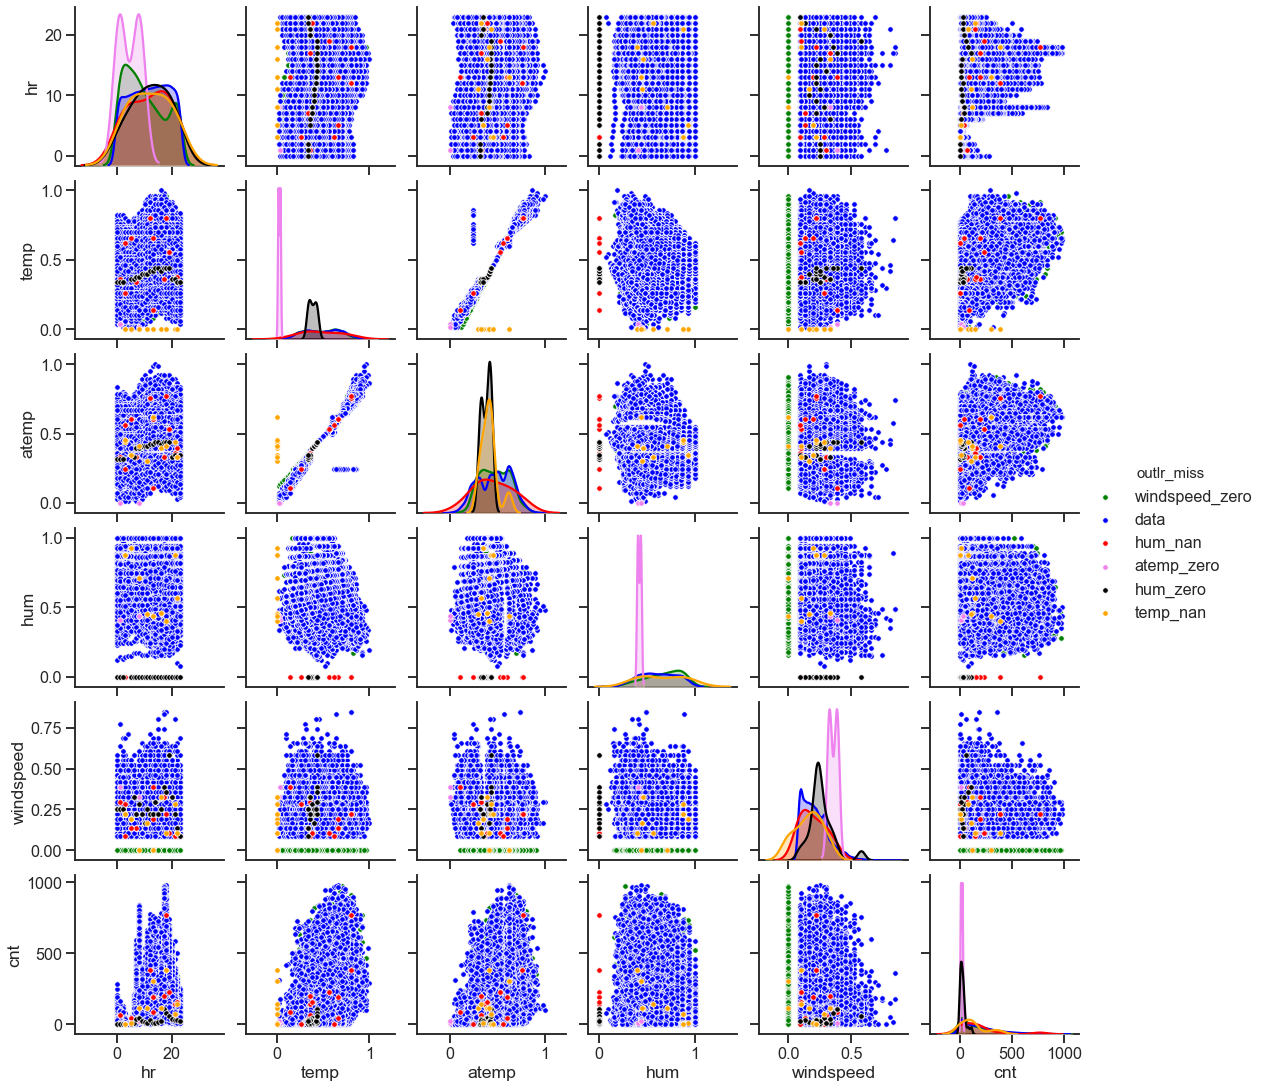

In [14]:
# Creamos la lista de columnas que queremos analizar, básicamente son las originales de la matriz con datos numéricos
features = ['hr','temp','atemp','hum','windspeed','season','weekday','weathersit','cnt','outlr_miss']

# Creamos una paleta de colores para nuestra columna de etiquetas con el fin de visualizarlas mejor. 
colorPalette = {'data':'blue', 'windspeed_zero':'green','hum_zero':'black', 'hum_nan':'red',
               'temp_nan':'orange', 'atemp_zero':'violet'}
# Creamos el grafico pairplot
sns.pairplot(df[features].fillna(0), hue="outlr_miss", palette=colorPalette, plot_kws = {'s': 30})
# mostramos el grafico
plt.show()
plt.close('all')

La paleta de colores nos permite observar rápidamente la ubicación de los datos que no tienen valores, para lo cual desarrollaremos una estrategia individual para cada parámetro. De la visualización de estos datos podemos observar datos que presentan valores atípicos en su comportamiento normal los cuales también deben tener un tratamiento para corregir sus valores. 

### 3.4 Marcando los valores atípicos
Revisando la matriz de correlación podemos observar valores atípicos en los datos de temperatura y temperatura aparente, por lo cual procedemos a identificar su procedencia y a marcarlos como "outliers".

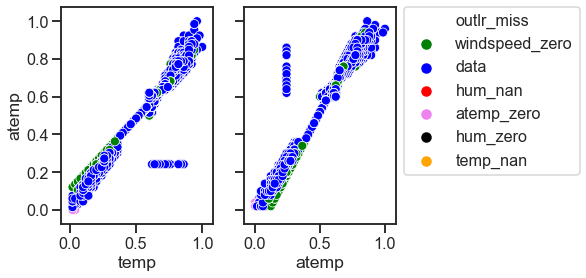

In [15]:
# Realizamos el scatter plot de temperatura y sensación térmica
fig, axes = plt.subplots(nrows=1, ncols=2, sharey=True)
g1 = sns.scatterplot(x="temp", y="atemp", data = df,hue="outlr_miss",  palette=colorPalette, ax=axes[0], legend=False)
g2 = sns.scatterplot(x="atemp", y="temp", data = df,hue= "outlr_miss", palette=colorPalette, ax=axes[1], legend='brief')
g2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
plt.close('all')

Para poder encontrar los datos que se encuentran fuera de la proporción verificamos el comportamiento normal de las variables temperatura y temperatura aparente, encontrando que existe una relación proporcional entre ambos parámetros. Como vemos que los datos que aparentemente están mal varían entre temp = 0.6–0.85 y los de atem son aproximadamente 0.24, buscamos los valores cuya resta (0.6–0.24) = 0.36 sea mayor a 0.3, por ejemplo:

In [16]:
# Buscamos la matriz cuya resta entre temp y atemp sea mayor a 0.3
pd.set_option("display.max.rows", None)
df[(df.temp-df.atemp)>0.3]

,dteday,season,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,year,month,month_int,weekday_int,outlr_miss
14131,2012-08-17,fall,0,0,Fri,1,Clear,0.68,0.24,0.57,0.16,88,2012,Aug,8,4,data
14132,2012-08-17,fall,1,0,Fri,1,Clear,0.66,0.24,0.65,0.10,54,2012,Aug,8,4,data
14133,2012-08-17,fall,2,0,Fri,1,Clear,0.66,0.24,0.61,0.13,19,2012,Aug,8,4,data
14134,2012-08-17,fall,3,0,Fri,1,Clear,0.64,0.24,0.65,0.10,6,2012,Aug,8,4,data
14135,2012-08-17,fall,4,0,Fri,1,Clear,0.64,0.24,0.73,0.16,9,2012,Aug,8,4,data
14136,2012-08-17,fall,5,0,Fri,1,Clear,0.64,0.24,0.73,0.10,36,2012,Aug,8,4,data
14137,2012-08-17,fall,6,0,Fri,1,Clear,0.62,0.24,0.78,0.13,157,2012,Aug,8,4,data
14138,2012-08-17,fall,7,0,Fri,1,Clear,0.64,0.24,0.73,0.10,379,2012,Aug,8,4,data
14139,2012-08-17,fall,8,0,Fri,1,Clear,0.68,0.24,0.65,0.13,668,2012,Aug,8,4,data
14140,2012-08-17,fall,9,0,Fri,1,Clear,0.70,0.24,0.58,0.10,378,2012,Aug,8,4,data


Luego del filtro encontramos que los datos que causa la desviación de los parámetros se encuentran en el día 17-08-2012, por lo que procedemos a extraerlos y etiquetarlos:

In [17]:
# Extraemos los datos del día mencionado
ts = pd.to_datetime('08/17/2012')

# Marcamos estos datos como outliners
df.loc[(df['outlr_miss']=='data') & df['dteday'].isin([ts]), 'outlr_miss'] = 'atemp_outlr'

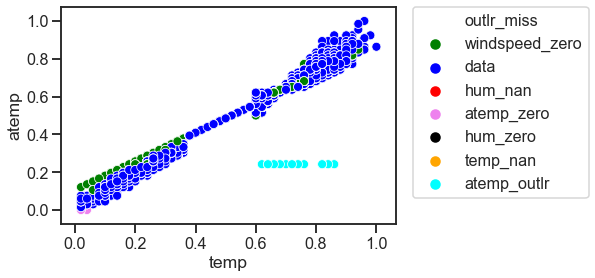

In [18]:
# Verificamos que la etiqueta halla quedado asignada correctamente. 
colorPalette = {'data':'blue', 'windspeed_zero':'green','hum_zero':'black', 'hum_nan':'red',
               'temp_nan':'orange', 'atemp_zero':'violet', 'atemp_outlr':'cyan'}
sns.scatterplot(x="temp", y="atemp", data=df, hue="outlr_miss", palette=colorPalette)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### 4. Corrigiendo los valores de datos NaN, ceros y valores atípicos

En esta sección realizaremos la corrección de los diferentes datos que presentan desviaciones; para ellos utilizaremos diferentes algoritmos de predicción entrenándolos con los datos que consideramos están correctos y prediciendo los resultados de interés. 

### 4.1 Corrigiendo los valores atípicos en temperatura

Para poder corregir correctamente la desviación de los valores de la temperatura del día 17/08/2012, podemos realizar una predicción de regresión lineal y utilizar el coeficiente y la intersección para ajustarlos. Adicionalmente aprovechamos el modelo entrenado para corregir los valores 10 valores NaN encontrados en la temperatura y 2 valores de cero encontrados en la temperatura aparente, por lo que solo trabajaremos con los datos que actualmente tienen la etiqueta 'atemp_zero', 'temp_nan', 'atemp_outlr'.

In [19]:
# importamos el modelo de regresión lineal
from sklearn.linear_model import LinearRegression

In [20]:
# creamos una copia del dataset
df_copy = df.copy(deep=True)

# creamos un filtro para utilizar los datos que no tienen problemas en temp y atemp
ftr = ['windspeed_zero', 'data', 'hum_nan','hum_zero']

# Extraemos los datos que no tiene problemas en temp y atemp
df1 = df_copy[df_copy.outlr_miss.isin(ftr)]

# de la matriz resultante  extraemos los datos de temp y atemp descartanto los posibles NaN que puedan haber
df1 = df1[['temp','atemp']].dropna()

# Igualamos X a los valores de temperatura, y a los valores de temperatura aparente.
X   = df1['temp'].values.reshape(-1,1)
y   = df1['atemp'].values.reshape(-1,1)
regressor = LinearRegression()
regressor.fit(X, y)

# filtramos los valores de la matriz que son iguales a "atemp_outlr" y a los correspondientes valores de atemp le aplicamos 
# la fórmula para predecir su valor.

df_copy.loc[df_copy['outlr_miss'].isin(['atemp_outlr']), 'atemp'] = df_copy['temp']*regressor.coef_[0][0] + regressor.intercept_[0] 
df_copy.loc[df_copy['outlr_miss'].isin(['atemp_zero']), 'temp']   = df_copy['temp']*regressor.coef_[0][0] + regressor.intercept_[0] 
df_copy.loc[df_copy['outlr_miss'].isin(['temp_nan']), 'temp']     = (df_copy['atemp'] - regressor.intercept_[0])/regressor.coef_[0][0]


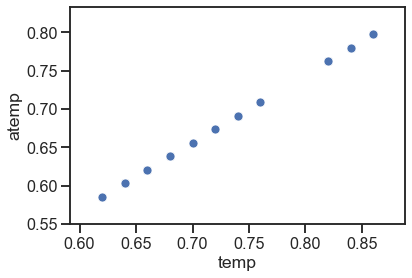

In [21]:
# verificamos que los valores de temperatura hayan sido corregidos
sns.scatterplot(x="temp", y="atemp", data = df_copy[df_copy["dteday"].isin([ts])])

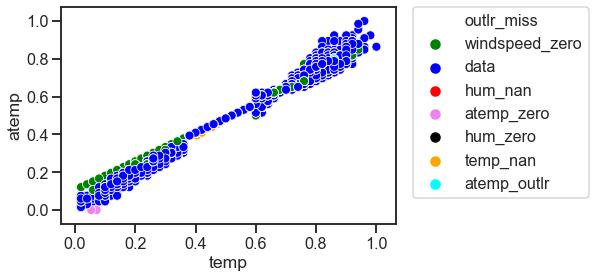

In [22]:
# verificamos el cambio en los datos que fueron corregidos
colorPalette = {'data':'blue', 'windspeed_zero':'green','hum_zero':'black', 'hum_nan':'red',
               'temp_nan':'orange', 'atemp_zero':'violet', 'atemp_outlr':'cyan'}
sns.scatterplot(x="temp", y="atemp", data=df_copy, hue="outlr_miss", palette=colorPalette)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### 4.2 Direccionando ceros y NaN en el parámetro de humedad:
En cuanto al parámetro de humedad es necesario revisar las posibles correlaciones que podemos encontrar para poder predecir este resultado. Comenzaremos revisando el comportamiento de la humedad respecto al tiempo, a la temperatura y la velocidad del viento. 

Verificamos inicialmente el comportamiento de la humedad a lo largo del día. Observamos que aunque no es una relación lineal podemos utilizar este parámetro para predecir el resultado ya que su comportamiento es similar en todo el año.

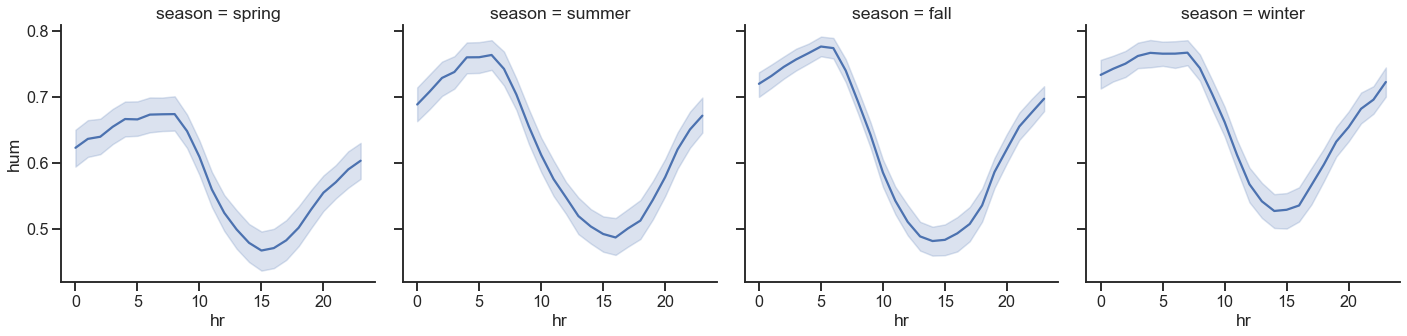

In [23]:
# Realizamos el gráfico de la humedad a lo largo del día separándolo inicialmente por estación
sns.relplot(x="hr", y="hum", data=df_copy, kind="line", col="season")

Realizamos un procedimiento similar pero con la etiqueta de condición climática

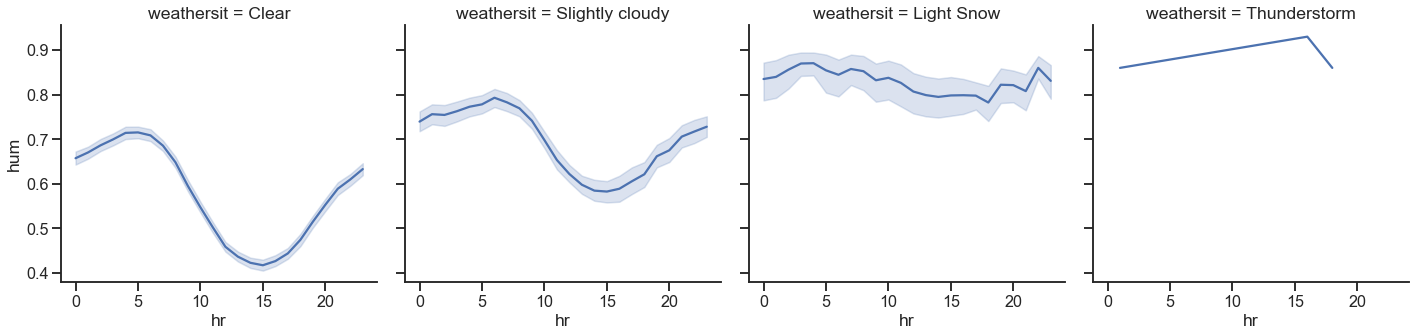

In [24]:
# Realizamos el gráfico de la humedad a lo largo del día separándolo por apreciación del clima.
sns.relplot(x="hr", y="hum", data=df_copy, kind="line", col="weathersit")

Observamos adicionalmente el comportamiento de la temperatura a través del día y verificamos su relación con la humedad. Podemos observar que el comportamiento de la temperatura es constante en todas las estaciones del año e inversamente proporcional al parámetro de humedad.

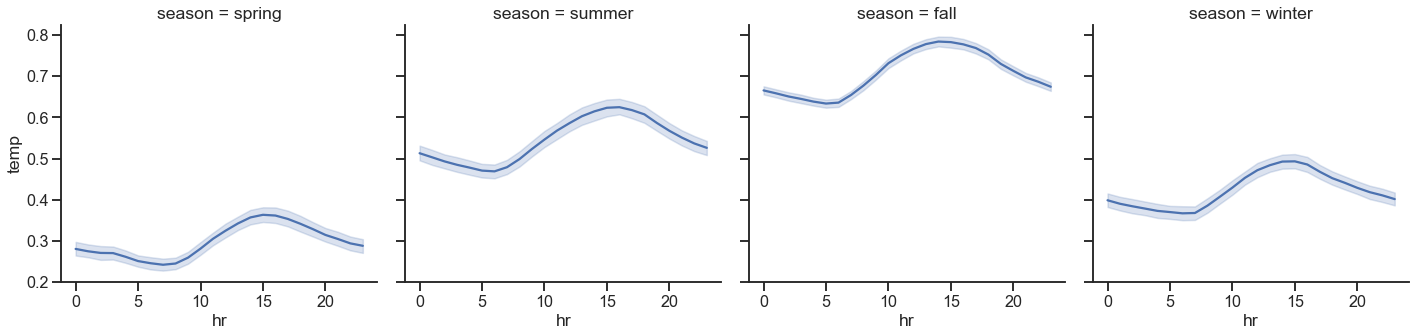

In [25]:
# Realizamos el grafico de temperatura a lo largo del día separándolo por estación. 
sns.relplot(x="hr", y="temp", data=df_copy, kind="line", col="season")

Como podemos observar la variable humedad se caracteriza mejor de acuerdo con las estaciones del año que de acuerdo a la apreciación del clima. Por tal motivo procedemos a realizar una codificación de las estaciones del año para poder predecir adecuadamente el comportamiento de la variable humedad.

### Transformamos los datos de estación, por uno codificado que refleje el cambio de las estaciones. 
Esta labor la realizaremos a través de la biblioteca "category_ecnoders", el objetivo principal es reflejar numéricamente la secuencia del cambio de las estaciones a lo largo del año. 

In [26]:
# Procedemos a categorizar el parámetro estaciones (season) importamos la biblioteca de categorización
import category_encoders as ce 

# Ordenamos la categorización por estación 'season'
df_copy['season_int'] = df_copy['season']

# Creamos el mapa de categorización donde col = columna es el objetivo, Mapping = Texto, es el texto categorizado en 
# el orden requerido

season_mapping = [{"col":"season_int", "mapping": {'spring':1, 'summer':2, 'fall':3, 'winter':4}}] 

# Creamos el encoder con las características para el manejo de los datos ausentes y los que no reconozca
encoder = ce.OrdinalEncoder(cols=['season_int'],mapping = season_mapping, return_df = True, handle_unknown='return_nan', 
                            handle_missing='return_nan')  
# transformamos la df con el encoder
df_copy = encoder.fit_transform(df_copy)

In [27]:
df_copy.head()

,dteday,season,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,year,month,month_int,weekday_int,outlr_miss,season_int
0,2011-01-01,spring,0,0,Sat,0,Clear,0.24,0.29,0.81,0.00,16,2011,Jan,1,5,windspeed_zero,1.00
1,2011-01-01,spring,1,0,Sat,0,Clear,0.22,0.27,0.80,0.00,40,2011,Jan,1,5,windspeed_zero,1.00
2,2011-01-01,spring,2,0,Sat,0,Clear,0.22,0.27,0.80,0.00,32,2011,Jan,1,5,windspeed_zero,1.00
3,2011-01-01,spring,3,0,Sat,0,Clear,0.24,0.29,0.75,0.00,13,2011,Jan,1,5,windspeed_zero,1.00
4,2011-01-01,spring,4,0,Sat,0,Clear,0.24,0.29,0.75,0.00,1,2011,Jan,1,5,windspeed_zero,1.00


### Matriz dummy para la categoría de estaciones
Creamos un dummy array para categorizar las estaciones del año la cual tiene los siguientes valores:  spring, summer, fall, Winter.

In [28]:
# Realizamos la matriz dummy para la columna season y se concatena con la matriz actual. 
season_dummy = pd.get_dummies(df_copy.season)
df_copy = pd.concat([df_copy, season_dummy],axis=1)

In [29]:
# Revisamos nuevamente la matriz
df_copy.head()

,dteday,season,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,year,month,month_int,weekday_int,outlr_miss,season_int,fall,spring,summer,winter
0,2011-01-01,spring,0,0,Sat,0,Clear,0.24,0.29,0.81,0.00,16,2011,Jan,1,5,windspeed_zero,1.00,0,1,0,0
1,2011-01-01,spring,1,0,Sat,0,Clear,0.22,0.27,0.80,0.00,40,2011,Jan,1,5,windspeed_zero,1.00,0,1,0,0
2,2011-01-01,spring,2,0,Sat,0,Clear,0.22,0.27,0.80,0.00,32,2011,Jan,1,5,windspeed_zero,1.00,0,1,0,0
3,2011-01-01,spring,3,0,Sat,0,Clear,0.24,0.29,0.75,0.00,13,2011,Jan,1,5,windspeed_zero,1.00,0,1,0,0
4,2011-01-01,spring,4,0,Sat,0,Clear,0.24,0.29,0.75,0.00,1,2011,Jan,1,5,windspeed_zero,1.00,0,1,0,0


Buscamos la fecha de los días en que la humedad es cero y la comparamos con los días anteriores verificando su comportamiento anómalo.

In [30]:
# Buscamos los días en que la humedad es cero o NAN
df_copy[df_copy["hum"].isin([np.nan])].dteday.unique()

array(['2011-01-19T00:00:00.000000000', '2011-01-23T00:00:00.000000000',
       '2011-02-25T00:00:00.000000000', '2011-05-15T00:00:00.000000000',
       '2011-08-06T00:00:00.000000000', '2011-09-22T00:00:00.000000000',
       '2011-12-20T00:00:00.000000000', '2012-04-28T00:00:00.000000000',
       '2012-07-10T00:00:00.000000000', '2012-08-02T00:00:00.000000000',
       '2012-08-27T00:00:00.000000000', '2012-12-08T00:00:00.000000000',
       '2012-12-13T00:00:00.000000000'], dtype='datetime64[ns]')

In [31]:
df_copy[df_copy["hum"]== 0].dteday.unique()

array(['2011-03-10T00:00:00.000000000'], dtype='datetime64[ns]')

Verificamos el comportamiento de la variable humedad y temperatura durante el día

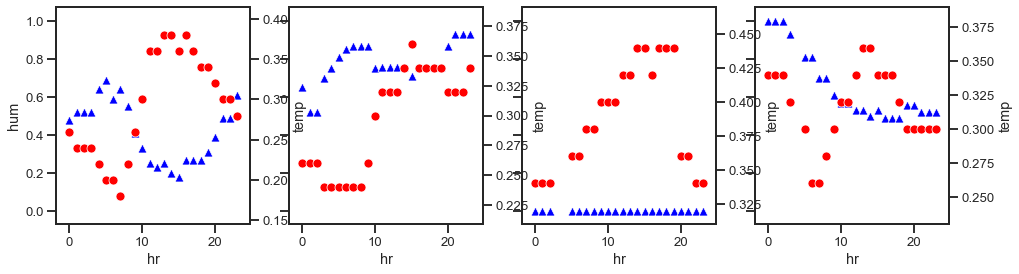

In [32]:
# parámetros de configuración de seaborn
sns.set(context='talk', style='ticks', font_scale=0.8, rc={'figure.figsize':(16,4)}) 

#Escogemos los días a analizar
day =pd.to_datetime(['2011/3/08','2011/3/09','2011/3/10','2011/3/11'])
# Creamos un gráfico múltiple
fig, axes = plt.subplots(nrows=1, ncols=4, sharey=True)
#Construimos los gráficos para los días cercanos al día que tiene valores de cero
for i, ax in enumerate(axes):
    ax1=sns.scatterplot(x="hr", y="hum", data=df_copy[(df_copy.dteday==day[i])],color='blue', marker='^', ax=ax)
    ax2 = ax1.twinx()
    ax2 = sns.scatterplot(x="hr", y="temp", data=df_copy[(df_copy.dteday==day[i])],color='red')
plt.show()

### Direccionando ceros y NaN en el parámetro de humedad:
Luego de observar el comportamiento de la humedad a lo largo del día, vamos a realizar la predicción de los valores esperado para reemplazar los ceros y valores de NAN por valores pronosticados por uno algoritmos RandomForest.

In [33]:
# Hacemos dos copias de la segunda matriz para incluir las columnas ya creadas, una para entrenamiento y otra para prueba
df_Train = df_copy.copy(deep=True)
df_Test  = df_copy.copy(deep=True)

# la matriz de entrenamiento serán todos los valores de humedad diferentes a NAN o 0. La # matriz de prueba lleva solo los 
# datos donde aparece NAN o 0.
options  = [np.nan, 0]
df_Train = df_Train.loc[df_Train.hum.isin(options)==False]
df_Test  = df_Test.loc[df_Test['hum'].isin(options)]

# Nos deshacemos de la columna humedad en esta matriz ya que será la que vamos a predecir.
df_Test.drop(columns = ['hum'], inplace=True)

In [34]:
# importamos el algoritmo de RandomForest el cual se ajusta a las características del fenómeno estudiado.
from sklearn.ensemble import RandomForestRegressor

In [35]:
# determinamos las variables con las cuales vamos a predecir los valores de humedad
predictors = ['hr','temp','month_int', 'weekday_int','fall', 'spring','summer', 'winter']
# llamamos el algoritmo de clasificación. 
rfr = RandomForestRegressor(n_estimators=100)
# realizamos el ajuste del algoritmo
rfr.fit(df_Train[predictors], df_Train['hum'])
# realizamos la predicción del se de datos que necesitamos. 
df_Test['hum'] = rfr.predict(X = df_Test[predictors])
# unificamos el resultado. 
df_copy2 = pd.concat([df_Train,df_Test],axis='rows', sort=False)
df_copy2.sort_index(inplace=True)

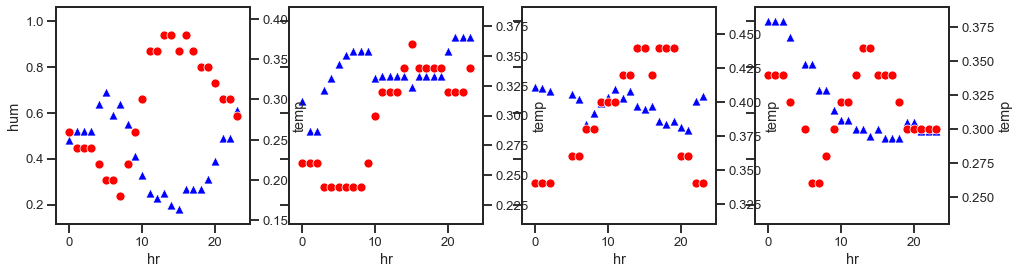

In [36]:
#Construimos los gráficos para los días cercanos al día que tenía los valores de cero
fig, axes = plt.subplots(nrows=1, ncols=4, sharey=True)
for i, ax in enumerate(axes):
    ax1=sns.scatterplot(x="hr", y="hum", data=df_copy2[(df_copy2.dteday==day[i])],color='blue', marker='^', ax=ax)
    ax2 = ax1.twinx()
    ax2 = sns.scatterplot(x="hr", y="temp", data=df_copy2[(df_copy2.dteday==day[i])],color='red')
plt.show()

Como podemos observar, luego de la predicción, los valores de humedad ya han sido corregidos y conservan la tendencia central de los datos de los días aledaños.

### 4.3 Manejando los ceros en la velocidad del viento:
Para analizar los datos de la velocidad del viento, realizamos el mismo análisis de humedad observando su comportamiento a través del día durante las diferentes estaciones del año y en base a las diferentes apreciaciones del clima. 

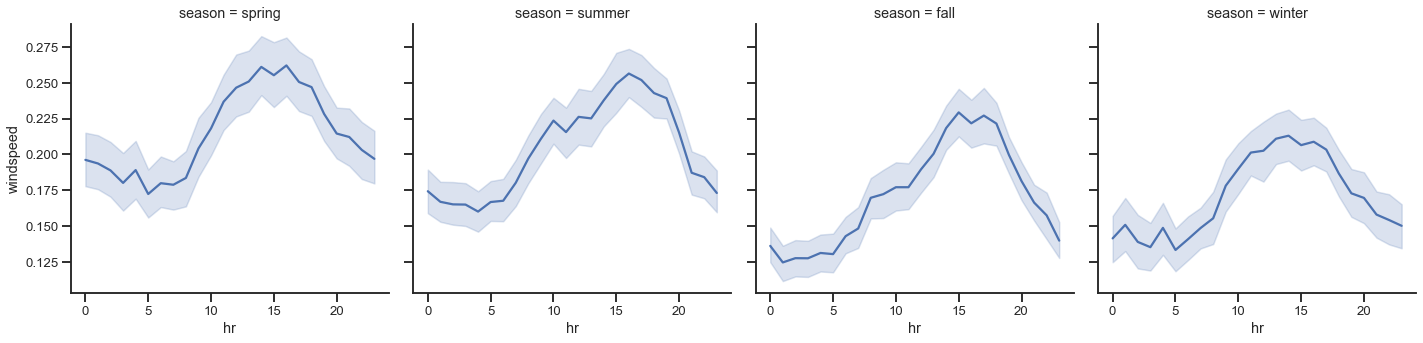

In [37]:
# Observamos el comportamiento de la velocidad del viento a través del día por estaciones 
sns.relplot(x="hr", y="windspeed", data=df_copy2, kind="line", col="season")

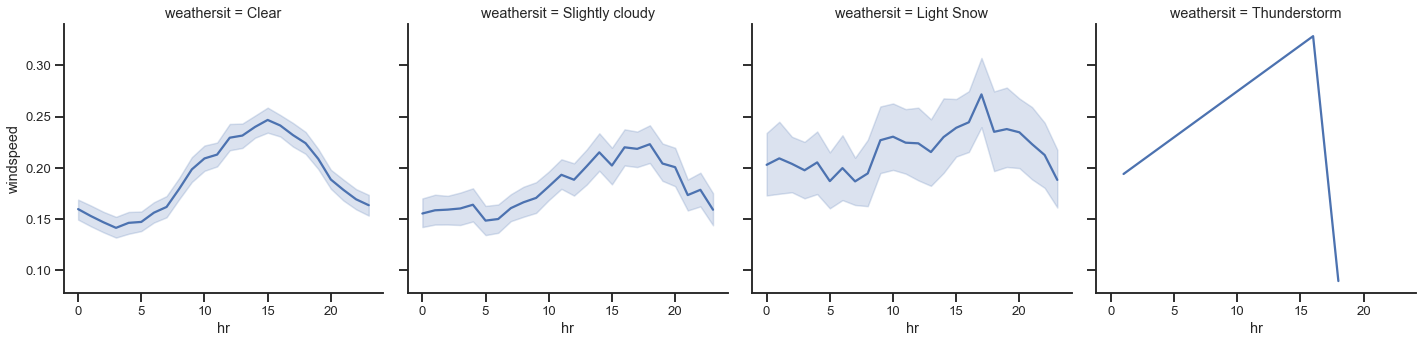

In [38]:
# Observamos el comportamiento de la velocidad del viento a través del día por estado del clima
sns.relplot(x="hr", y="windspeed", data=df_copy2, kind="line", col="weathersit")

Nuevamente observamos que los datos de la velocidad del viento conservan un comportamiento coherente en relación al cambio de las estaciones a largo del año, lo cual no acontece al clasificarlo de acuerdo al estado del tiempo, por lo anterior definimos que la predicción se realizara de acuerdo a las estaciones del año. 

In [39]:
# creamos dos copias de los datos modificados
df_Train2 = df_copy2.copy(deep=True)
df_Test2  = df_copy2.copy(deep=True)

filters  = [np.nan, 0]
df_Train2 = df_Train2.loc[df_Train2.windspeed.isin(filters)==False] #Matriz con valores diferentes de NaN o cero
df_Test2  = df_Test2.loc[df_Test2['windspeed'].isin(filters)] # Matriz con valores iguales a NaN o cero
df_Test2.drop(columns = ['windspeed'], inplace=True) # descartamos la columna de velocidad del viento

# Entrenamos la regresión 
predictors = ['hr','temp','month_int', 'weekday_int','fall', 'spring','summer', 'winter','hum']
rfr = RandomForestRegressor(n_estimators=100)
rfr.fit(df_Train2[predictors], df_Train2['windspeed'])

# Predecimos los valores y los guardamos en la nueva columna “windspeed” 
df_Test2['windspeed'] = rfr.predict(X = df_Test2[predictors])

# Creamos una nueva matriz
df_copy3 = pd.concat([df_Train2,df_Test2],axis='rows', sort=False)
df_copy3.sort_values(by='dteday').head()

,dteday,season,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,year,month,month_int,weekday_int,outlr_miss,season_int,fall,spring,summer,winter
5,2011-01-01,spring,5,0,Sat,0,Slightly cloudy,0.24,0.26,0.75,0.09,1,2011,Jan,1,5,data,1.00,0,1,0,0
2,2011-01-01,spring,2,0,Sat,0,Clear,0.22,0.27,0.80,0.17,32,2011,Jan,1,5,windspeed_zero,1.00,0,1,0,0
3,2011-01-01,spring,3,0,Sat,0,Clear,0.24,0.29,0.75,0.13,13,2011,Jan,1,5,windspeed_zero,1.00,0,1,0,0
4,2011-01-01,spring,4,0,Sat,0,Clear,0.24,0.29,0.75,0.10,1,2011,Jan,1,5,windspeed_zero,1.00,0,1,0,0
6,2011-01-01,spring,6,0,Sat,0,Clear,0.22,0.27,0.80,0.13,2,2011,Jan,1,5,windspeed_zero,1.00,0,1,0,0


### 4.4 Visualizando los cambios
Luego de haber corregido todos los valores de NaN, Ceros y Atipicos, procedemos a visualizar los cambios en la matriz de correlación, para esto construimos nuevamente la matriz con las antiguas etiquetas de colores de la siguiente manera: 

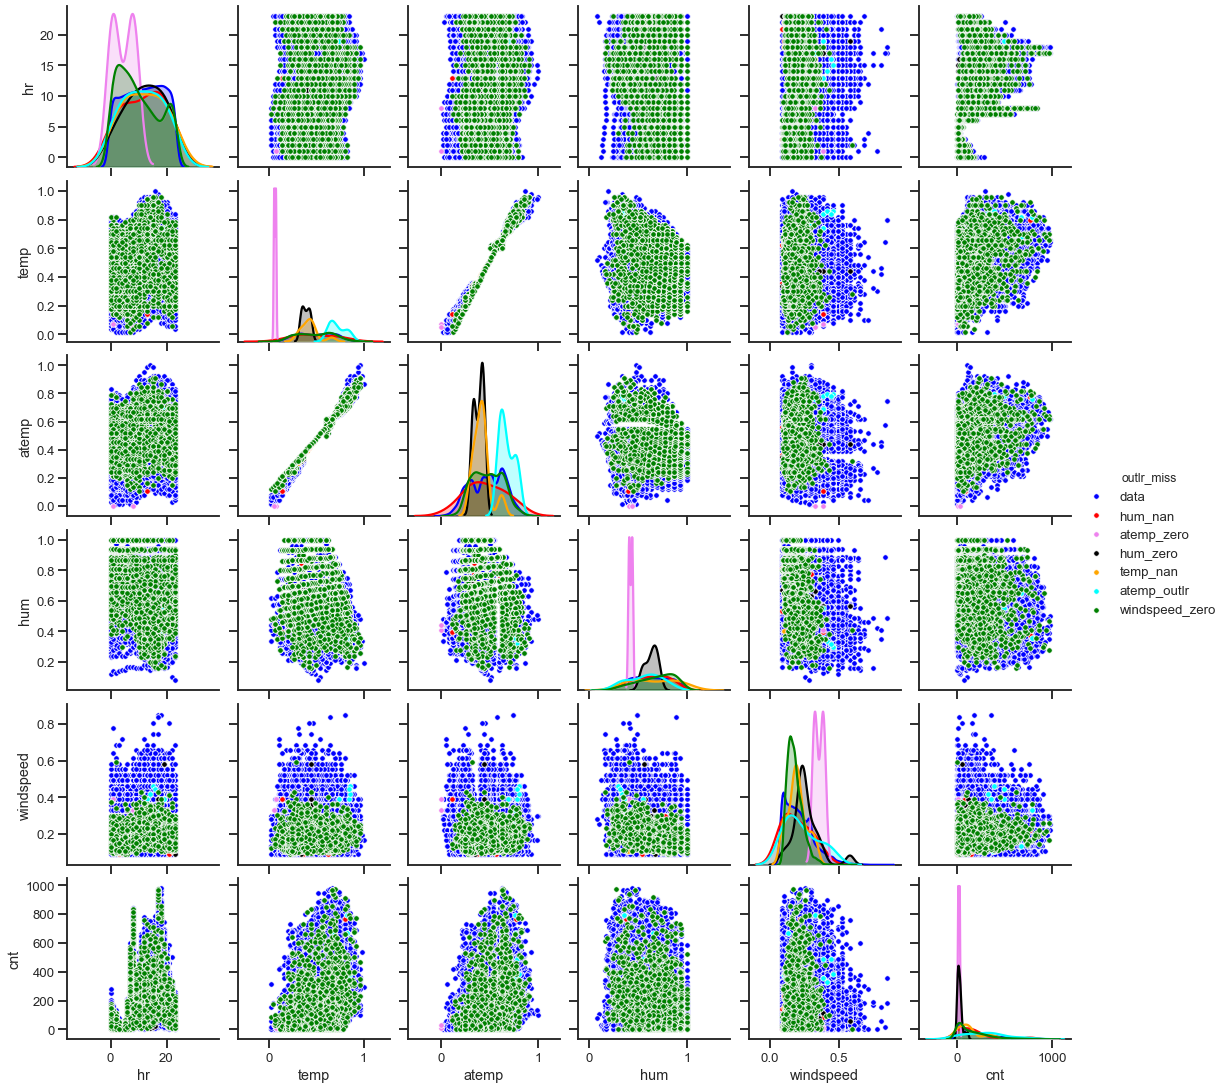

In [40]:
# Creamos la lista de columnas que queremos analizar, basicamente son las originales de la matriz con datos numericos
features = ['hr','temp','atemp','hum','windspeed','season','weekday','weathersit','cnt','outlr_miss']

# Creamos una paleta de colores para nuestra columna de etiquetas con el fin de visualizarlas mejor. 
colorPalette = {'data':'blue', 'windspeed_zero':'green','hum_zero':'black', 'hum_nan':'red',
               'temp_nan':'orange', 'atemp_zero':'violet', 'atemp_outlr':'cyan'}
# Creamos el grafico pairplot
sns.pairplot(df_copy3[features], hue="outlr_miss", palette=colorPalette, plot_kws = {'s': 30})
# mostramos el grafico
plt.show()
plt.close('all')

Finalmente podemos observar que ya no tenemos datos fuera de parámetros que puedan desviar el entrenamiento de modelos predictivos, para determinar los volúmenes esperados de alquileres a lo largo del año. Esta fase hará parte de un segundo articulo donde veremos el uso correcto de algoritmos de predicción para nuestra base de datos. 

Para finalizar este articulo realizaremos un análisis básico del comportamiento de la variable de estudio. 

In [41]:
# Borramos la columna de etiquetas creada para el ejercicio  
df_copy3.drop(columns = ["outlr_miss"], inplace=True)
# Guardamos una copia del archivo modificado.   
df_copy3.to_csv('bikeSharing_modified_cured.csv', index=False)

### 5. Visualización del comportamiento de la variable de estudio. 
Para culminar realizaremos una visualización básica del comportamiento de la variable  alquiler dejando espacio para una análisis mas profundo en un segundo artículo. 

Visualizamos inicialmente la correlación de las variables de estudio, observamos la alta correlación entre la temperatura y la sensación térmica. Se evidencia una correlación media positiva entre el numero de alquiler de bicicletas con la temperatura y una relación débil negativa entre el alquiler y la humedad. 

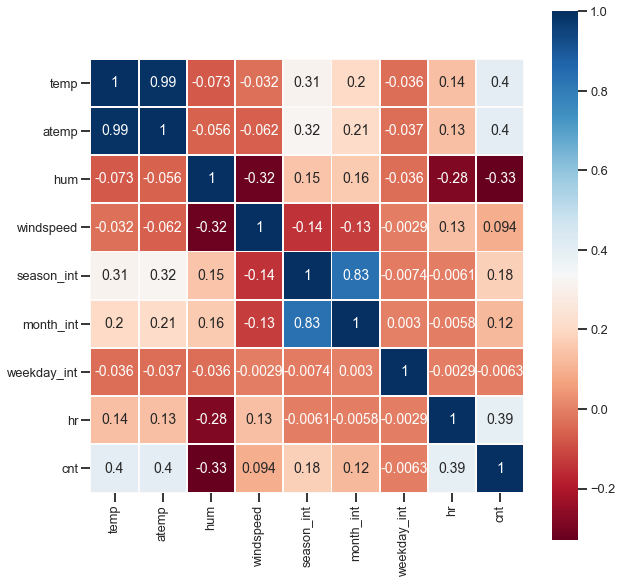

In [42]:
# Sacamos la matriz de columnas para relación.
mat_corr = df_copy3[["temp","atemp","hum","windspeed","season_int","month_int","weekday_int","hr","cnt"]].corr()

# Construimos la matriz de correlación con el modulo de mapa de calor de seaborn
plt.figure(figsize=(10,10), dpi=70)
sns.heatmap(data=mat_corr, annot=True, square=True, linewidths=1, linecolor='snow', cmap='RdBu')

Visualizamos el comportamiento del alquiler por clasificación de días, laborales y no laborales. Observamos que la mayor cantidad de alquileres se presenta durante los días laborales y se ha incrementado entre el transcurso del primer y segundo año.

Text(0.5, 1.0, 'Comportamiento alquiler por día laboral o FDS')

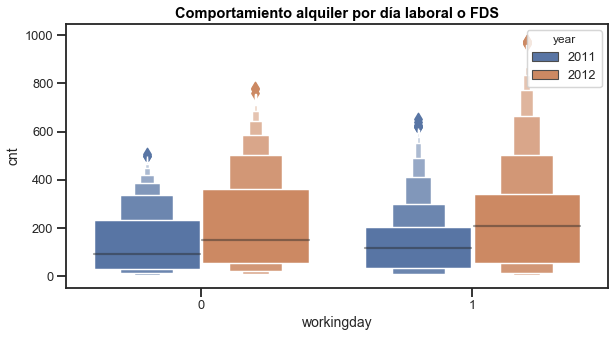

In [44]:
plt.figure(figsize=(10,5), dpi=70)
fontdictT={'fontsize': 15, 'weight' : 'bold', 'horizontalalignment': 'center'}
g= sns.boxenplot(y="cnt",x="workingday", data=df_copy3, orient="v", hue='year')
g.set_title("Comportamiento alquiler por día laboral o FDS", fontdict=fontdictT, color="black")

Observamos el comportamiento de la variable alquiler a lo largo de los meses del año, observando un pico en los meses de marzo y septiembre; la variable aumenta de marzo a septiembre paulatinamente y comienza a disminuir de septiembre a diciembre, manteniéndose baja de enero a marzo. 

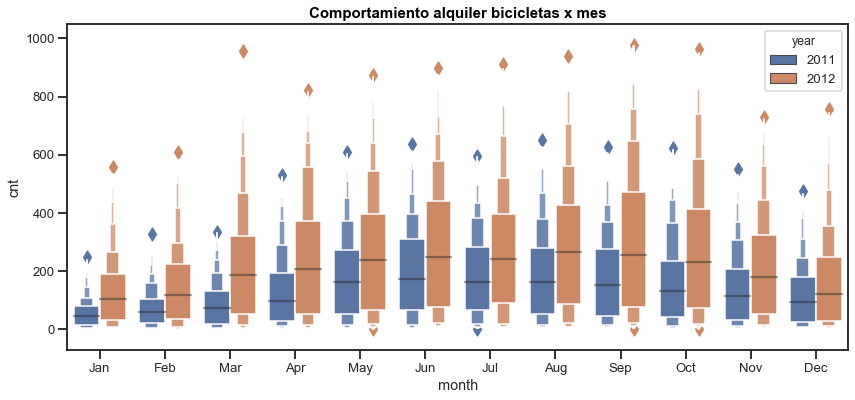

In [45]:
# Visualización de alquiler a lo largo del año
plt.figure(figsize=(14,6))
g = sns.boxenplot(x="month", y="cnt", data=df_copy3, hue="year")
g.set_title("Comportamiento alquiler bicicletas x mes", fontdict=fontdictT, color="black")
plt.show()

Al realizar la distribución a través de las estaciones del año, observamos que la temporada de mayor alquiler es verano y otoño, disminuyendo para el invierno e incrementando paulatinamente en primavera hasta el inicio del verano. 

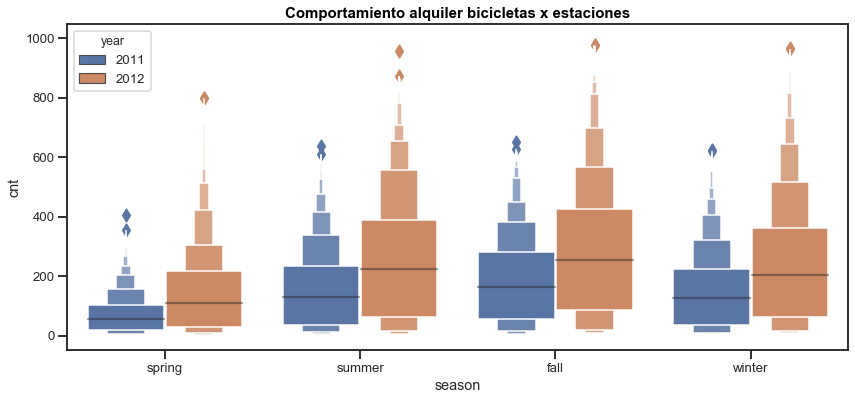

In [46]:
# Visualización de alquiler durante las diferentes estaciones del año
plt.figure(figsize=(14,6))
g = sns.boxenplot(x="season", y="cnt", data=df_copy3, hue="year")
g.set_title("Comportamiento alquiler bicicletas x estaciones", fontdict=fontdictT, color="black")
plt.show()

En cuanto a la distribución de la variable a lo largo del día, observamos que tenemos picos de alquiler entre 7 a 8 de la mañana y  5 a 6 de la tarde. 

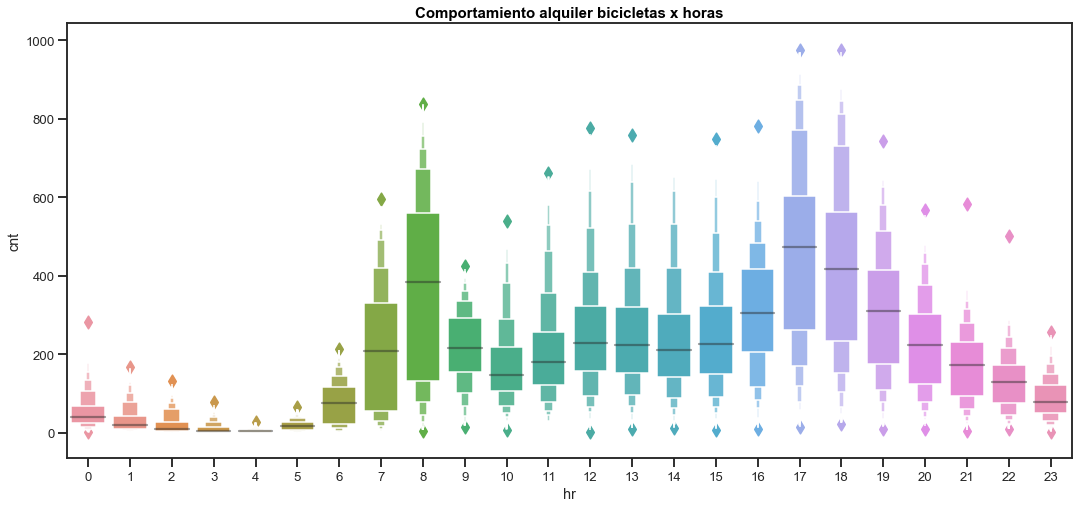

In [47]:
# Visualización de alquiler a lo largo del día
plt.figure(figsize=(18,8))
g= sns.boxenplot(x="hr", y="cnt", data=df_copy3)
g.set_title("Comportamiento alquiler bicicletas x horas", fontdict=fontdictT, color="black")
plt.show()

Visualizamos el comportamiento de la variable alquiler a lo largo del día separado en cada una de las estaciones del año observando que en otoño se produce la mayor cantidad de alquileres. De igual manera observamos que el comportamiento de los picos de alquiler se conserva a las horas de inicio y fin de la jornada a lo largo del año. En todas las épocas del año el alquiler de bicicletas aumenta gradualmente entre las 8 y las 5 de la tarde independiente de la estación del año. 

[(0.02, 1.0), Text(0, 0.5, 'Temperatura'), None]

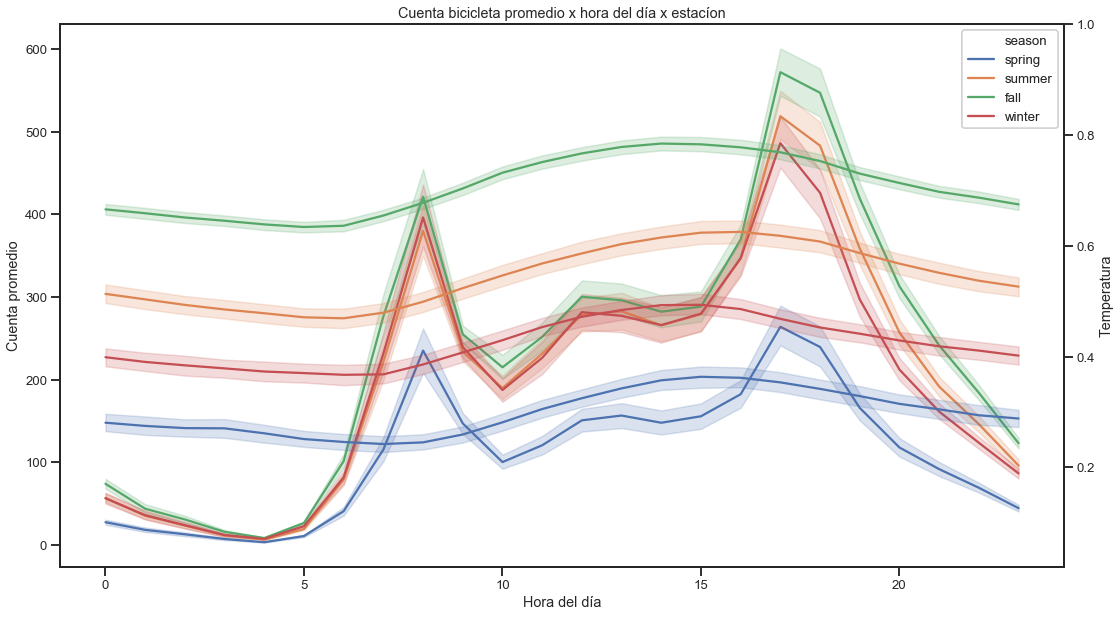

In [48]:
# Visualización de alquiler a lo largo del día vs la temperatura día
plt.figure(figsize=(18,10))
seasonOrder  = ['spring','summer','fall','winter']
WeekdayOrder = ['Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri']


ax1 = sns.lineplot(x="hr", y="cnt",hue="season",  hue_order=seasonOrder, data=df_copy3)
ax1.set(xlabel='Hora del día', ylabel='Cuenta promedio', 
        title ="Cuenta bicicleta promedio x hora del día x estacíon", label='big')

ax1a = ax1.twinx()
ax1a = sns.lineplot(x="hr", y="temp", hue="season", hue_order=seasonOrder, data=df_copy3)
ax1a.set(ylabel='Temperatura', label='big', ylim=(df_copy3.temp.min(),df_copy3.temp.max())) 

Finalmente revisamos este comportamiento durante los días de la semana observan un comportamiento muy diferente en sábados domingos o festivos, siendo el mayor pico de alquiler sobre el medio día y se extiende hasta entrada la noche independientemente de la estación del año. 

[(0.02, 1.0), Text(0, 0.5, 'Temperature'), None]

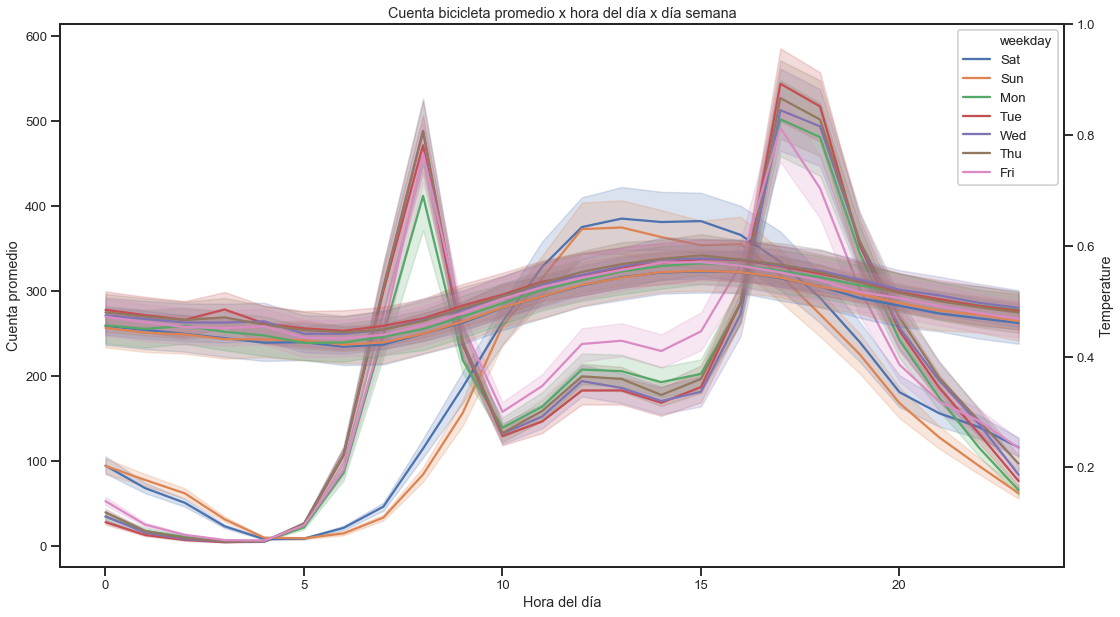

In [49]:
# Visualización de alquiler a lo largo del día por dia de la semana vs temperatura día
plt.figure(figsize=(18,10))
ax2 = sns.lineplot(x="hr", y="cnt", hue="weekday", hue_order=WeekdayOrder, data=df_copy3)
ax2.set(xlabel='Hora del día', ylabel='Cuenta promedio',
        title="Cuenta bicicleta promedio x hora del día x día semana",label='big')
        
ax2a = ax2.twinx()
ax2a = sns.lineplot(x="hr", y="temp", hue="weekday", hue_order=WeekdayOrder, data=df_copy3)
ax2a.set(ylabel='Temperature', label='big', ylim=(df_copy3.temp.min(),df_copy3.temp.max()))

Realizó:

_Javier A. Ochoa M.  
Ing. Mecánico especialista en gestión de mantenimiento <br />
técnicas de mantenimiento predictivo y confiabilidad integral. <br />
+57-3213192915  
ruslombia@gmail.com  
Bogotá – Colombia_  